# Detection of Lung Cancer Risk at Early Stage


## Abstract

Lung Cancer is the third most common cancer in the world and is the leading cause of death cancer. If lung cancer is found at an earlier stage before it is spread and developed, the treatment will have more chance to be successful. However, lung cancer do not usually appear until the disease is at an advanced stage. Even when lung cancer does cause symtomps, people usually ignore it or not treat it seriously. Thus, it is beneficial for people to know if they belong to the group which having high risk of lung cancer and have pre-screening plan to detect it.

This project aim is to help people check if they are at the high risk of having lung cancer and give recommendation for them to check up


## Data Source

The dataset was published in DataWorld, where those data is collected from the website online lung cancer prediction system and get feedback from the user. This site has implemented during period of August 2013 when the people who visited this site.

The total number of data points inside given dataset is 309. There are no missing labels or features in the dataset. The dataset includes a total of 16 columns where each column represents user’s information such as gender, age, smoking history, alcoholic assumption, previous chronic diseases and other corresponding symptoms (coughing, yellow skin, chest pain, etc). 


## Problem Formulation
- Data Points: People who attend the survey
- Features: Users information such as gender, age, chronic disease history, mental health related issues, allergy and their personal behaviors (smoking history, alcoholic assumption)
-  Label: binary value represents if it is a lung cancer(True) or if it is not a lung cancer

In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Analysis
Extract Information from CSV data and do some data preprocessing step

In [577]:
# Load data into data frame
df = pd.read_csv("lung_cancer_info.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [578]:
# Get the columns of each data point
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Since the goal of this project is to help people find out if they belong to high risk group of lung cancer, we will drop out the symbolic symtomps (which only shows up when they actually get the disease)

In [579]:
# Drop unecessary columns
df = df.drop(columns = ['YELLOW_FINGERS', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
df.head()

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,LUNG_CANCER
0,M,69,1,2,1,1,2,1,2,2,YES
1,M,74,2,1,1,2,2,2,1,1,YES
2,F,59,1,1,2,1,2,1,2,1,NO
3,M,63,2,2,1,1,1,1,1,2,NO
4,F,63,1,1,1,1,1,1,2,1,NO


In [580]:
# Get the features for each data point
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'LUNG_CANCER'],
      dtype='object')

In [581]:
# Explore data's properties
print("Data Shape is: ", df.shape)
print("Data Information is ", df.info())

Data Shape is:  (309, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GENDER             309 non-null    object
 1   AGE                309 non-null    int64 
 2   SMOKING            309 non-null    int64 
 3   ANXIETY            309 non-null    int64 
 4   PEER_PRESSURE      309 non-null    int64 
 5   CHRONIC DISEASE    309 non-null    int64 
 6   FATIGUE            309 non-null    int64 
 7   ALLERGY            309 non-null    int64 
 8   WHEEZING           309 non-null    int64 
 9   ALCOHOL CONSUMING  309 non-null    int64 
 10  LUNG_CANCER        309 non-null    object
dtypes: int64(9), object(2)
memory usage: 26.7+ KB
Data Information is  None


In [582]:
# Clean data
df.isnull().sum()

GENDER               0
AGE                  0
SMOKING              0
ANXIETY              0
PEER_PRESSURE        0
CHRONIC DISEASE      0
FATIGUE              0
ALLERGY              0
WHEEZING             0
ALCOHOL CONSUMING    0
LUNG_CANCER          0
dtype: int64

In [583]:
# Encoding the gender and diagnosis result data
# LUNG_CANCER = YES = 1, LUNG_CANCER = NO = 0
# Gender = MALE = 1, Gender = FEMALE = 0

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values and storing in another column
df['LUNG_CANCER'] = labelencoder.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = labelencoder.fit_transform(df['GENDER'])

df.head()

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,LUNG_CANCER
0,1,69,1,2,1,1,2,1,2,2,1
1,1,74,2,1,1,2,2,2,1,1,1
2,0,59,1,1,2,1,2,1,2,1,0
3,1,63,2,2,1,1,1,1,1,2,0
4,0,63,1,1,1,1,1,1,2,1,0


<b>Visualize the colleration map: </b> Building colleration matrix to visualize the relationship between variables present inside dataset. It helps summarizing the correlations between all variables inside dataset.

<AxesSubplot:>

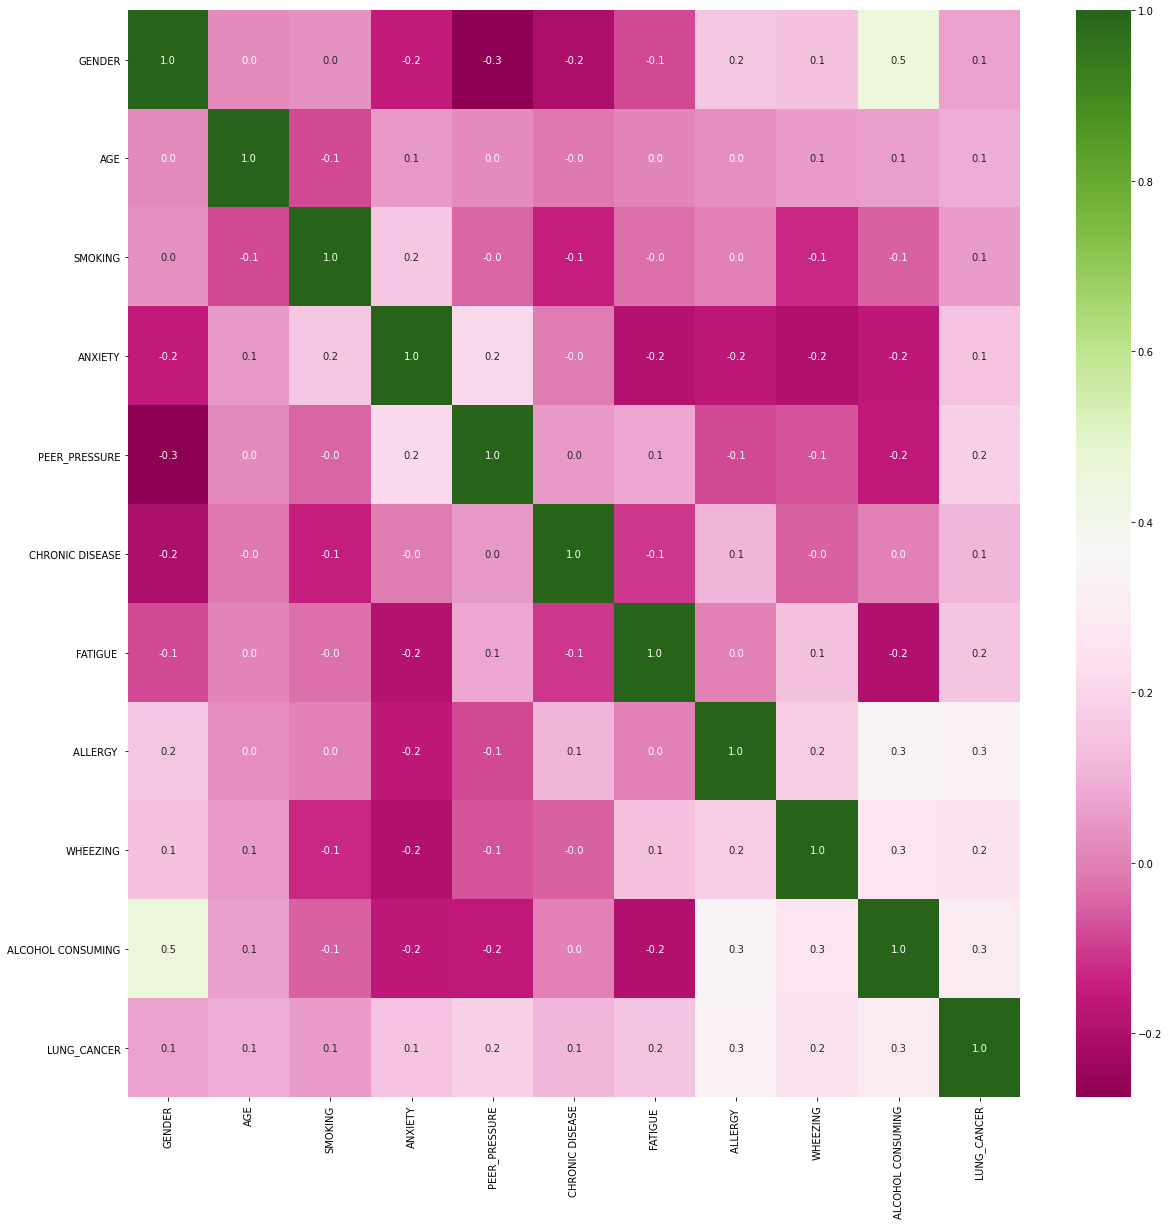

In [584]:
# Visualize colleration map
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='PiYG')

<AxesSubplot:title={'center':'Correlation between feature variable and target variable '}>

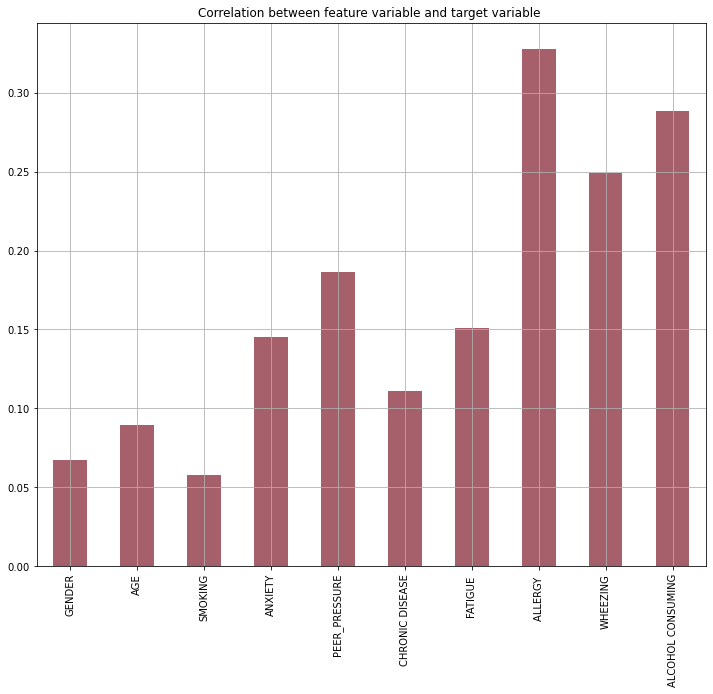

In [585]:
df.drop('LUNG_CANCER', axis=1).corrwith(df.LUNG_CANCER).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation between feature variable and target variable ",color="#A6606C")

### Step 2: Prepare Model

In [586]:
# Split data into features and labels
Features = df.drop(columns=['LUNG_CANCER'],axis=1)
Label = df['LUNG_CANCER']

In [587]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [588]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,y_train.shape)
print("Shape of Y_test  is " ,y_test.shape)

Shape of X_train is  (216, 10)
Shape of X_test  is  (93, 10)
Shape of Y_train is  (216,)
Shape of Y_test  is  (93,)


### Step 3: Model Training with KNN

1. Choose the best n neigbour value

0.07526881720430108


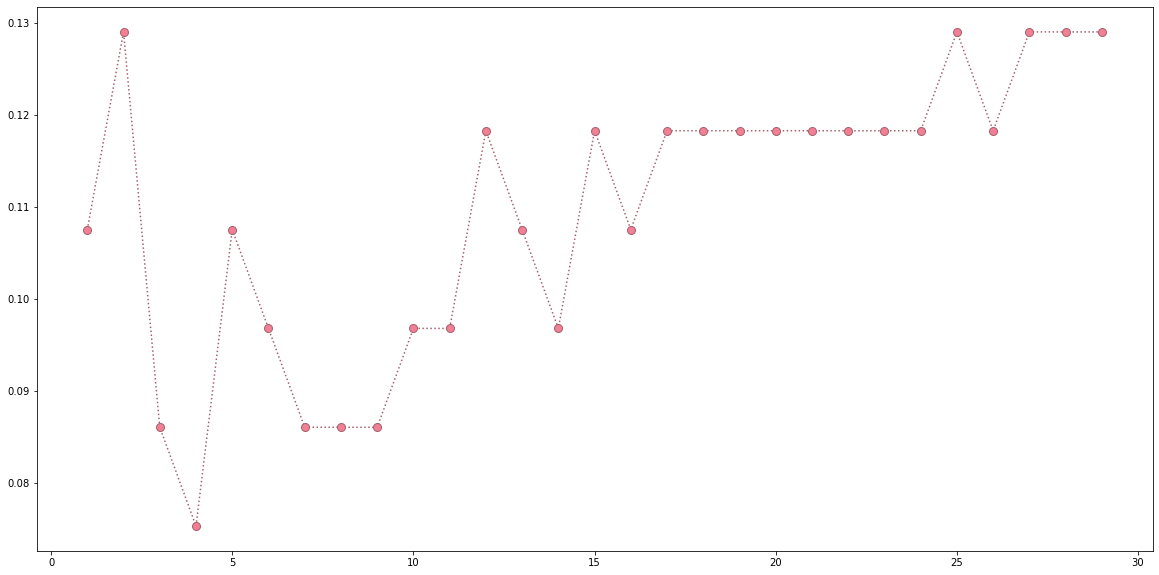

In [589]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the best n neighbour value
err_rate = [] 

# Loop through error rates from 1 to 50
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
print(min(err_rate))

# Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,30),err_rate,color='#A6606C',linestyle='dotted',marker='o',markerfacecolor='#F28094',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

2. Training the model

In [593]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [594]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9259259259259259
Test Accuracy of KNN Model is 0.9247311827956989


In [595]:
# Classification Report
print('KNN Classifier' + '\n')
print(classification_report(y_test,y_pred))

KNN Classifier

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.97      0.94      0.96        81

    accuracy                           0.92        93
   macro avg       0.82      0.89      0.85        93
weighted avg       0.93      0.92      0.93        93



[Text(0, 0.5, 'below zero'), Text(0, 1.5, 'above zero')]

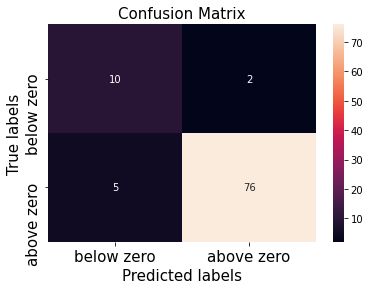

In [598]:
# Confusion matrix
#sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,cmap='Oranges',fmt='g')

# Visualize the confusion matrix you computed
ax= plt.subplot()

conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)
ax.yaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)

In [601]:
precision = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print("The precision of the model is: ", precision)

The precision of the model is:  0.9743589743589743
